In [2]:
import pandas as pd
import numpy as pn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
clothing=pd.read_csv("C:/Users/Agwaro/downloads/womens-clothing-reviews/Womens Clothing Reviews.csv")

In [4]:
clothing        # you can use clothing.head() or clothing.tail() to show top most and bottom most respectively

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [5]:
clothing.info() # to know the column arrangement of your dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 1.5+ MB


In [6]:
clothing.shape # rows and columns

(23486, 11)

In [7]:
del clothing["Title"] # for deleting one raw called Tilte

In [8]:
clothing # we call title from clothing (name of the object)

,Unnamed: 0,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [9]:
clothing.shape # rows and columns

(23486, 10)

In [10]:
# converting string variables to binary variables
division_1 = pd.get_dummies(clothing[["Division Name"]])
division_1[0:5]

,Division Name_General,Division Name_General Petite,Division Name_Initmates
0,0,0,1
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [11]:
#now renaming the values
division_1.rename(columns={'Division Name_General':'DivGeneral','Division Name_General Petite':'DivPetite','Division Name_Initmates':'DivInitmates'}, inplace=True)
division_1.head()

,DivGeneral,DivPetite,DivInitmates
0,0,0,1
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [12]:
# merge data frame "clothing" and "division_1" with the dataset given
clothing = pd.concat([clothing, division_1], axis=1)

In [13]:
# drop original column "division name" from "clothing" from the dataset
clothing.drop("Division Name", axis = 1, inplace=True)

In [14]:
clothing.head()

,Unnamed: 0,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Department Name,Class Name,DivGeneral,DivPetite,DivInitmates
0,0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimate,Intimates,0,0,1
1,1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,Dresses,Dresses,1,0,0
2,2,1077,60,I had such high hopes for this dress and reall...,3,0,0,Dresses,Dresses,1,0,0
3,3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,Bottoms,Pants,0,1,0
4,4,847,47,This shirt is very flattering to all due to th...,5,1,6,Tops,Blouses,1,0,0


In [15]:
# converting string variables to binary variables
department_1 = pd.get_dummies(clothing[["Department Name"]])
department_1[0:5]

,Department Name_Bottoms,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0


In [16]:
#now renaming the values
department_1.rename(columns={'Department Name_Bottoms':'DeBottoms','Department Name_Dresses':'DeDresses','Department Name_Intimate':'DeIntimate','Department Name_Jackets':'DeJackets','Department Name_Tops':'DeTops','Department Name_Trend':'DeTrend'}, inplace=True)
department_1.head()

,DeBottoms,DeDresses,DeIntimate,DeJackets,DeTops,DeTrend
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0


In [17]:
# merge data frame "clothing" and "department_1" with the dataset given
clothing = pd.concat([clothing, department_1], axis=1)

In [18]:
# drop original column "department name" from "clothing" from the dataset
clothing.drop("Department Name", axis = 1, inplace=True)

In [19]:
clothing.head()

,Unnamed: 0,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name,DivGeneral,DivPetite,DivInitmates,DeBottoms,DeDresses,DeIntimate,DeJackets,DeTops,DeTrend
0,0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimates,0,0,1,0,0,1,0,0,0
1,1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,Dresses,1,0,0,0,1,0,0,0,0
2,2,1077,60,I had such high hopes for this dress and reall...,3,0,0,Dresses,1,0,0,0,1,0,0,0,0
3,3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,Pants,0,1,0,1,0,0,0,0,0
4,4,847,47,This shirt is very flattering to all due to th...,5,1,6,Blouses,1,0,0,0,0,0,0,1,0


In [20]:
clothing['Class Name'].unique() # for checking the exact values of product in that row.

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [21]:
i = clothing.dropna() # for cleaning data now we use this. use of i can be any in my case using i as my variable

In [22]:
i.info() # still for cleaning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 17 columns):
Unnamed: 0                 22628 non-null int64
Clothing ID                22628 non-null int64
Age                        22628 non-null int64
Review Text                22628 non-null object
Rating                     22628 non-null int64
Recommended IND            22628 non-null int64
Positive Feedback Count    22628 non-null int64
Class Name                 22628 non-null object
DivGeneral                 22628 non-null uint8
DivPetite                  22628 non-null uint8
DivInitmates               22628 non-null uint8
DeBottoms                  22628 non-null uint8
DeDresses                  22628 non-null uint8
DeIntimate                 22628 non-null uint8
DeJackets                  22628 non-null uint8
DeTops                     22628 non-null uint8
DeTrend                    22628 non-null uint8
dtypes: int64(6), object(2), uint8(9)
memory usage: 1.6+ MB


In [23]:
i.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Class Name',
       'DivGeneral', 'DivPetite', 'DivInitmates', 'DeBottoms', 'DeDresses',
       'DeIntimate', 'DeJackets', 'DeTops', 'DeTrend'],
      dtype='object')

In [24]:
# descriptive stastics
clothing[['Clothing ID', 'Age', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Class Name',
       'DivGeneral', 'DivPetite', 'DivInitmates', 'DeBottoms', 'DeDresses',
       'DeIntimate', 'DeJackets', 'DeTops', 'DeTrend']].describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,DivGeneral,DivPetite,DivInitmates,DeBottoms,DeDresses,DeIntimate,DeJackets,DeTops,DeTrend
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936,0.589713,0.345738,0.063953,0.161756,0.269054,0.073874,0.043941,0.445712,0.005067
std,203.298980,12.279544,1.110031,0.382216,5.702202,0.491896,0.475618,0.244674,0.368235,0.443477,0.261571,0.204968,0.497055,0.071003
min,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0,0.5,'Positive Feedback Count')

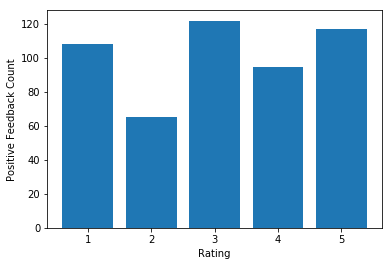

In [25]:
plt.bar(clothing['Rating'],clothing['Positive Feedback Count'])
plt.xlabel('Rating')
plt.ylabel('Positive Feedback Count')

Text(0,0.5,'Positive Feedback Count')

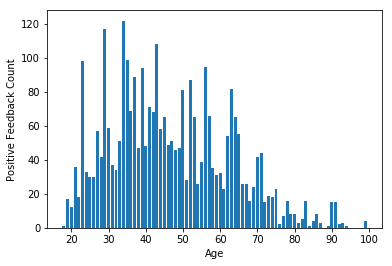

In [26]:
plt.bar(clothing['Age'],clothing['Positive Feedback Count'])
plt.xlabel('Age')
plt.ylabel('Positive Feedback Count')

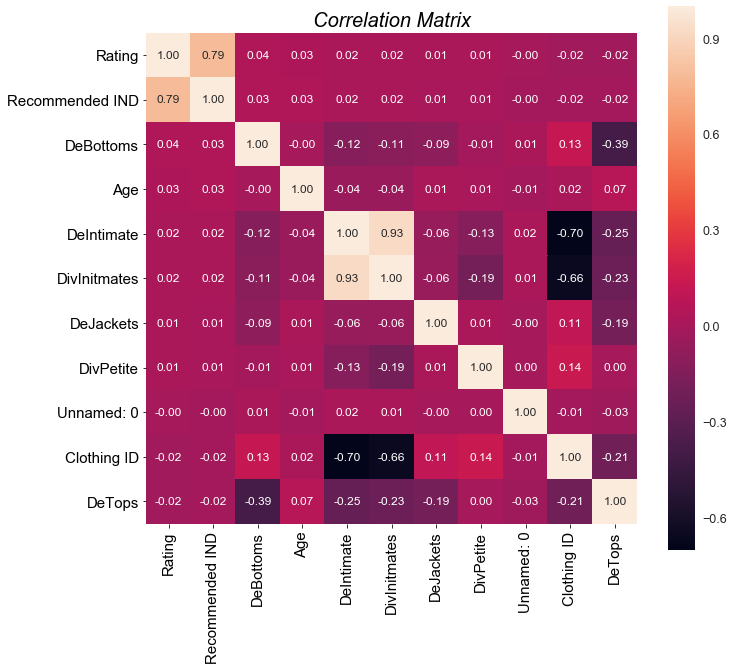

In [27]:
# for correlation among the feature used in the dataset
corrmat = clothing.corr()
cols = corrmat.nlargest(11, "Rating")["Rating"].index #specify number of columns to display i.e 11
f, ax = plt.subplots(figsize=(11, 10)) #size of matrix
cm = pn.corrcoef(clothing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0, size=15)
plt.xticks(rotation=90, size=15)
plt.title("Correlation Matrix",style='oblique', size= 20)
plt.show()


In [28]:
# decleare columns you want to use as features
features = ["Clothing ID","Age","Rating","Recommended IND","Positive Feedback Count", 'DivGeneral', 'DivPetite', 'DivInitmates', 'DeBottoms', 'DeDresses',
       'DeIntimate', 'DeJackets', 'DeTops', 'DeTrend']

In [29]:
# Specify the Prediction Target 
target = ["Class Name"]

In [30]:
#Extract Features(["Rating","Recommended IND","Positive Feedback Count"]) and Target ("["Class Name"]") Values into Separate Dataframes 
X = i[features]
y = i[target]

In [31]:
# Let us look at a typical row from our features:
X.iloc[2]

Clothing ID                1077
Age                          60
Rating                        3
Recommended IND               0
Positive Feedback Count       0
DivGeneral                    1
DivPetite                     0
DivInitmates                  0
DeBottoms                     0
DeDresses                     1
DeIntimate                    0
DeJackets                     0
DeTops                        0
DeTrend                       0
Name: 2, dtype: int64

In [33]:
X.head() # for features only 

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,DivGeneral,DivPetite,DivInitmates,DeBottoms,DeDresses,DeIntimate,DeJackets,DeTops,DeTrend
0,767,33,4,1,0,0,0,1,0,0,1,0,0,0
1,1080,34,5,1,4,1,0,0,0,1,0,0,0,0
2,1077,60,3,0,0,1,0,0,0,1,0,0,0,0
3,1049,50,5,1,0,0,1,0,1,0,0,0,0,0
4,847,47,5,1,6,1,0,0,0,0,0,0,1,0


In [34]:
y.head() # for target only ie class name

,Class Name
0,Intimates
1,Dresses
2,Dresses
3,Pants
4,Blouses


In [35]:
# Split the Dataset into Training and Test Datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [36]:
#type(X_train)
#type(X_test)
#type(y_train)
#type(y_test)
#X_train.head()
#y_train.describe()

In [37]:
# Fit on Train Set 
# using decision tree classifier as my model
iclothing= DecisionTreeClassifier(max_leaf_nodes=10, random_state=0, criterion="entropy", max_depth = 3)
iclothing.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [38]:
type(iclothing)

sklearn.tree.tree.DecisionTreeClassifier

In [39]:
# Predict on Test Set 
predictions = iclothing.predict(X_test)

In [40]:
predictions[:10]

array(['Blouses', 'Fine gauge', 'Jeans', 'Knits', 'Pants', 'Knits',
       'Dresses', 'Knits', 'Knits', 'Sweaters'], dtype=object)

In [41]:
y_test ["Class Name"][:10]

22069       Blouses
18614    Fine gauge
8894         Skirts
7700          Knits
1184          Pants
120           Knits
19064       Dresses
20955         Knits
21690         Knits
13545      Sweaters
Name: Class Name, dtype: object

In [42]:
# Measure Accuracy of the Classifier 
(accuracy_score(y_true = y_test, y_pred = predictions))*100

87.9887520085699